In [2]:
!pip install --user -r requirements.txt

  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
  Using cached ipython-8.4.0-py3-none-any.whl (750 kB)
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached numpy-1.21.5-cp39-cp39-win_amd64.whl (14.0 MB)
  Using cached opencv_python_headless-4.6.0.66-cp36-abi3-win_amd64.whl (35.5 MB)
  Using cached pandas-1.4.2-cp39-cp39-win_amd64.whl (10.5 MB)
     -------------------------------------- 12.6/12.6 MB 121.0 kB/s eta 0:00:00
     ------------------------------          29.2/36.9 MB 64.5 kB/s eta 0:02:01


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\User\

In [4]:
from intelligent_placer_lib.image_processing import *
from intelligent_placer_lib.intelligent_placer import check_image
from matplotlib import pyplot as plt

# Обработка и получение масок 10 изображений

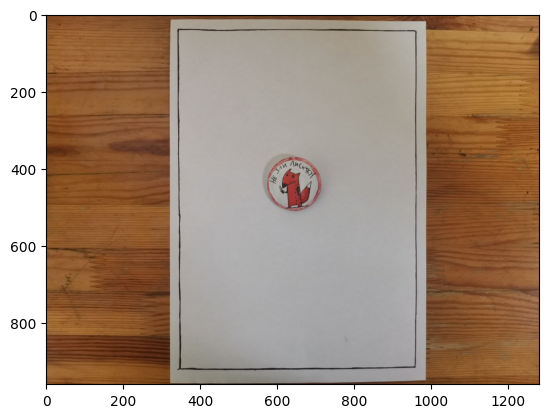

In [5]:
# Загрузим изображения
dir_iteams = './data/iteams'
im = im_upload(dir_iteams)
plt.imshow(im[1])


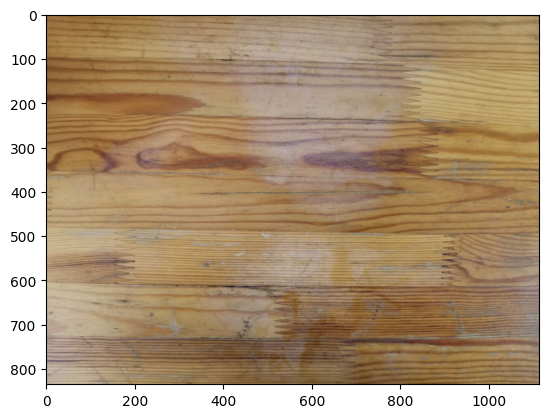

In [6]:
# Сожмем изображения для ускорения работы
c = im_comp(im)
plt.imshow(c[0])

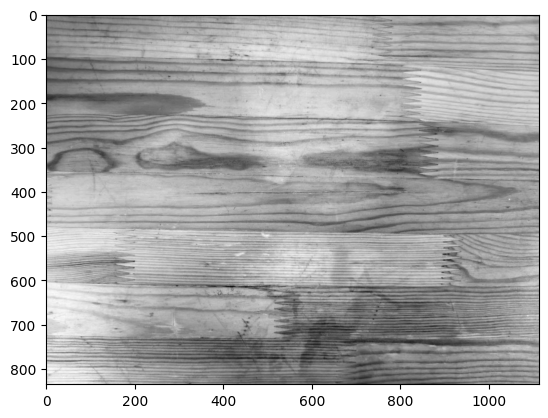

In [7]:
# Применим фильтр оттенков серого
g = set_grayscale(c)
plt.imshow(g[0], cmap='gray')


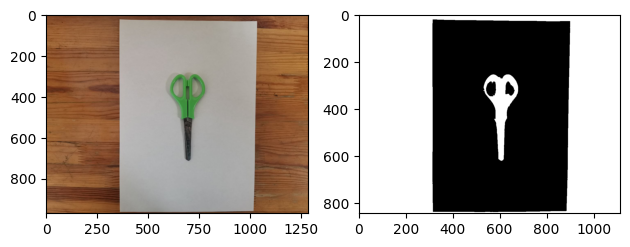

In [8]:
# Применим бинаризацию
im_otsu = binary_otsu(g)
im_otsu_open = morpholog(im_otsu)
f, ax = plt.subplots(1, 2) # создадим сетку, в которую будем выводить картинки
ax[0].imshow(im[9])
ax[1].imshow(im_otsu_open[9], cmap='gray') # выведем значение канала с чёрно-белой цветовой схемой
f.tight_layout() # добавим границы, чтобы графики не наезжали друг на друга

# plt.imshow(im[9])
# plt.imshow(im_otsu[9], cmap='gray')
# plt.axis('off')

# Поиск многоугольника и предметов на входном изображении


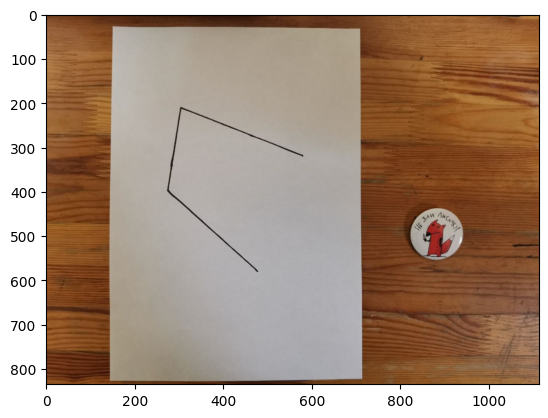

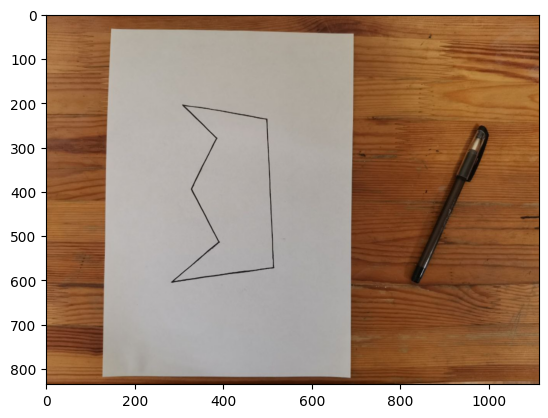

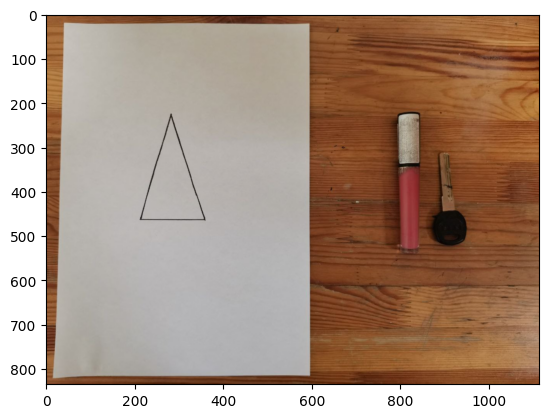

In [9]:
# Загрузим и сожмем изображения


dir_case = './data/case'
images = loading_and_preprocessing(dir_case)



plt.imshow(images[1])
plt.show()
plt.imshow(images[2]) 
plt.show()
plt.imshow(images[3]) 
 

In [10]:
# Преобразуем изображения в массивы пикселей
images_arrs = get_images_arrs(images)


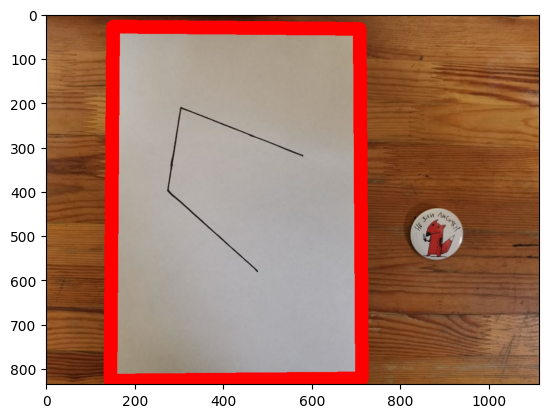

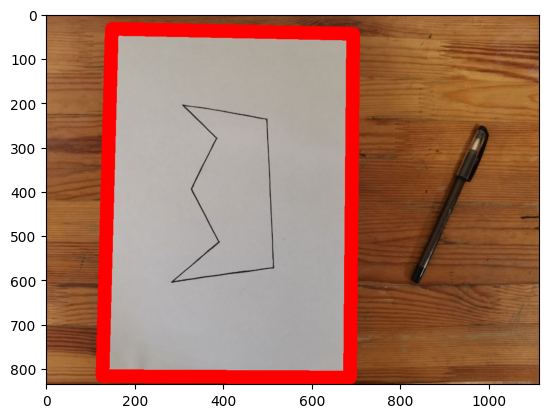

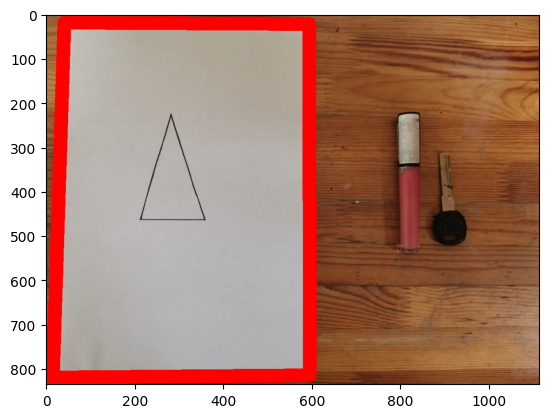

In [11]:
# Найдем контур листа 
images_contours = get_contours_list(images)

plt.imshow(images_contours[1])
plt.show()
plt.imshow(images_contours[2]) 
plt.show()
plt.imshow(images_contours[3]) 

# plt.imshow(images_contours[8])
# plt.show()

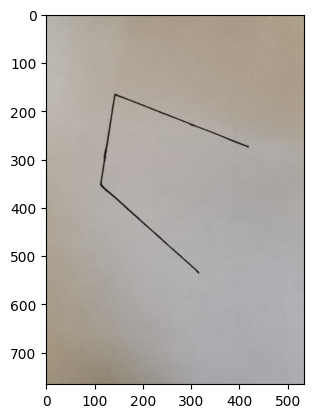

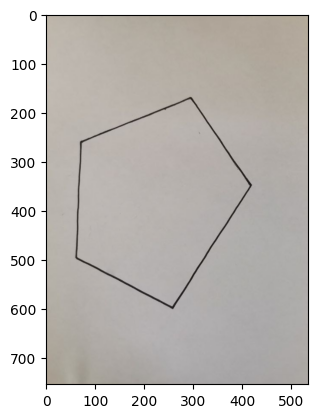

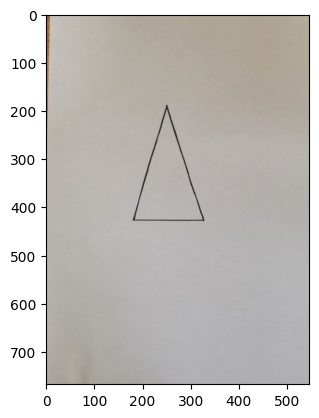

In [12]:
# Получим лист

images_list = get_list(images)

plt.imshow(images_list[1])
plt.show()
plt.imshow(images_list[9])
plt.show()
plt.imshow(images_list[3])

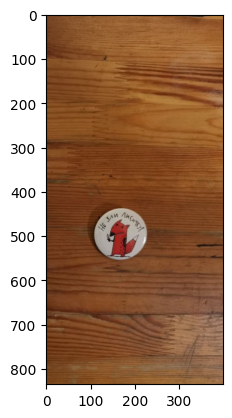

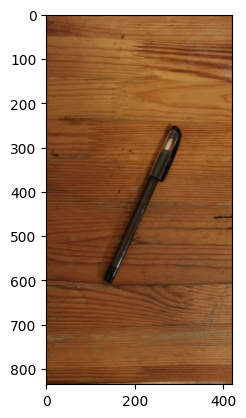

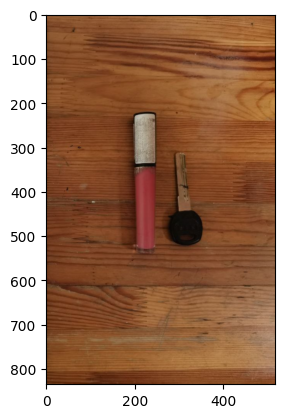

In [13]:
# Получим часть с объектами

images_objects = get_objects(images)

plt.imshow(images_objects[1])
plt.show()
plt.imshow(images_objects[2])
plt.show()
plt.imshow(images_objects[3])

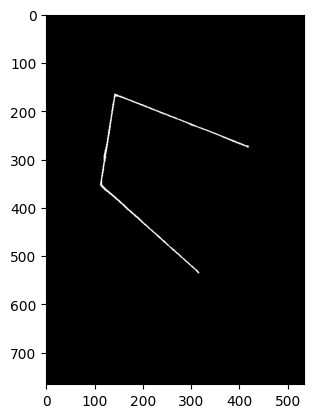

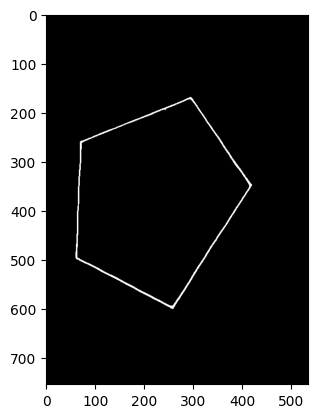

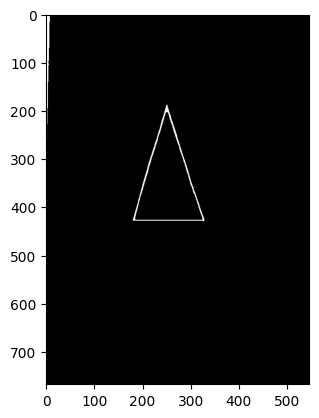

In [14]:
# Получим маску фигуры

ims_pol =  get_mask_list(images_list)

plt.imshow(ims_pol[1], cmap='gray')
plt.show()
plt.imshow(ims_pol[9], cmap='gray')
plt.show()
plt.imshow(ims_pol[3], cmap='gray')


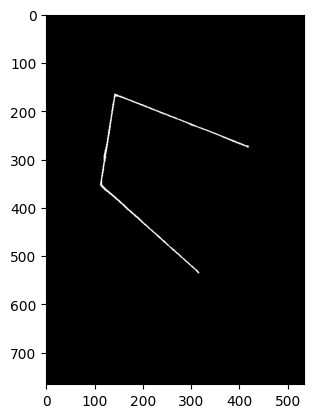

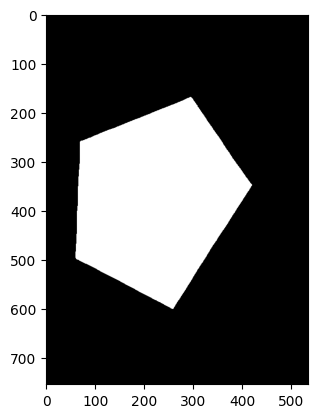

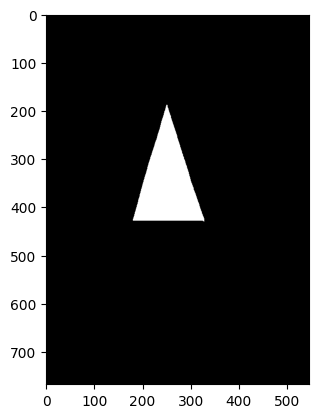

In [15]:
# Закрасим фигуру
fill_ims_pol = fill_mask_figure(ims_pol)

plt.imshow(fill_ims_pol[1], cmap='gray')
plt.show()
plt.imshow(fill_ims_pol[9], cmap='gray')
plt.show()
plt.imshow(fill_ims_pol[3], cmap='gray')


In [16]:
images_without_back = fill_masks_figure(images_objects)

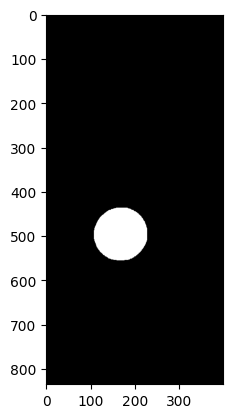

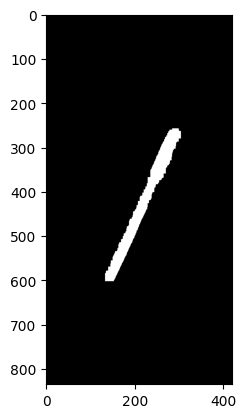

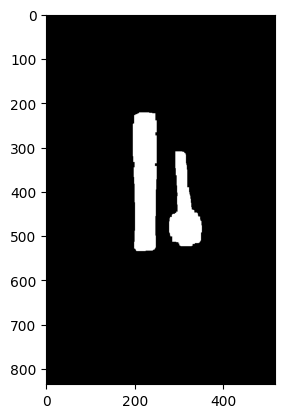

In [17]:
plt.imshow(images_without_back[1], cmap='gray')
plt.show()
plt.imshow(images_without_back[2], cmap='gray')
plt.show()
plt.imshow(images_without_back[3], cmap='gray')


# Сопоставление многоугольника и предметов 

In [18]:
# Сделаем так, чтобы можно было отбрать изображения по площади
checked_correct_pol = test_correct_pol(images_without_back, fill_ims_pol)
print(checked_correct_pol)


['YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES']


In [19]:
# Посмотрим на длину и ширину прямоугольника вокруг объектов и сравним её с высотой и шириной фигуры
contours_objects, contours_pols = rectangle_coordinates(images_without_back, fill_ims_pol)
checked_param_countours = check_parameter_height_width(contours_objects, contours_pols)
print(checked_param_countours)

['YES', 'YES', 'YES', 'NO', 'NO', 'YES', True, 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO']


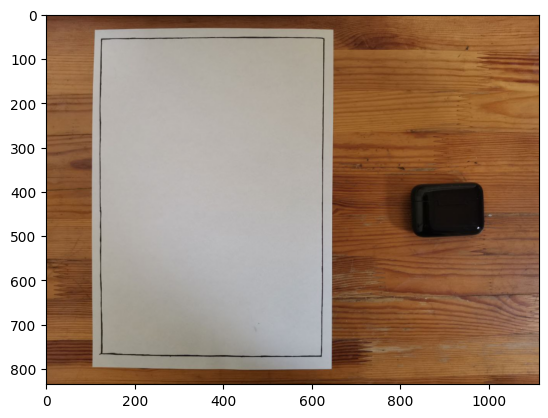

YES


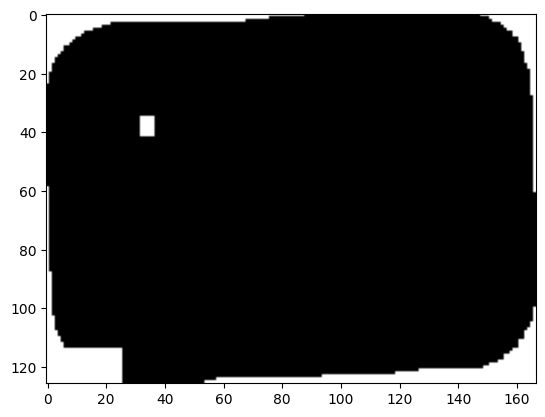

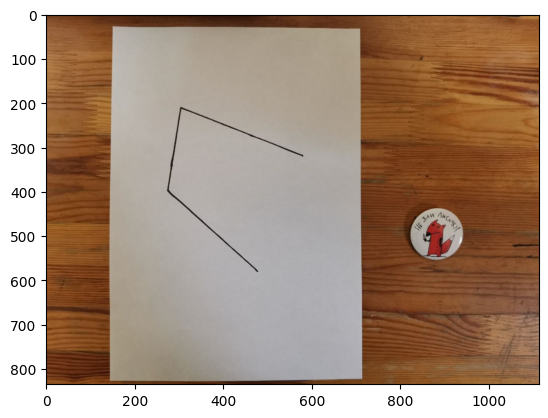

NO


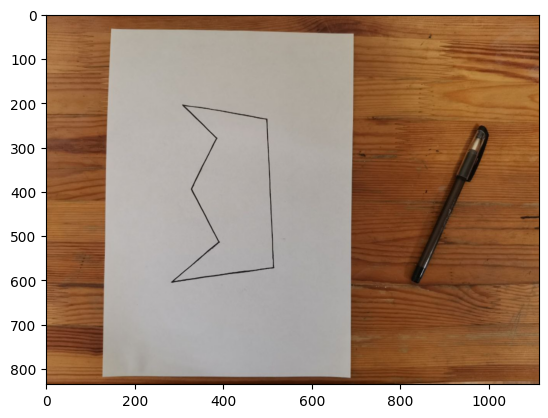

NO


In [22]:
# Сопоставим фигуру и объекты путем наложения прямоугольной области объектов на лист
for n in range(3):
    cont_pol = contours_pols[n]
    cont_obs = contours_objects[n]
    im_pol = fill_ims_pol[n]
    im_obs = images_without_back[n]
    res = mask_matching(cont_obs, cont_pol, im_obs, im_pol)
    plt.imshow(images[n])
    plt.show()
    print(res[0])
    if res[0] == 'YES':
        plt.imshow(res[1], cmap = 'gray')
        plt.show()

1.jpg YES


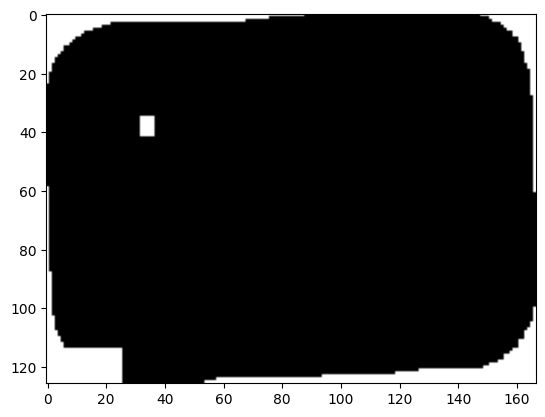

2.jpg NO
3.jpg YES


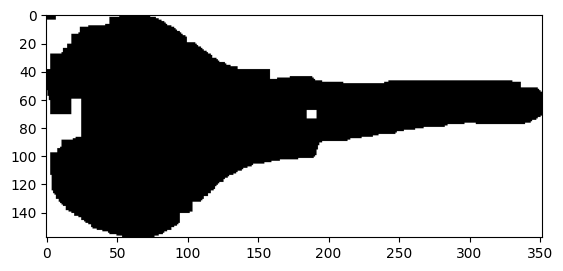

4.jpg NO
5.jpg NO
6.jpg NO
7.jpg YES


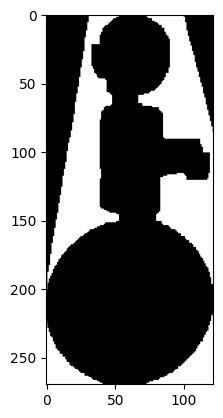

8.jpg YES


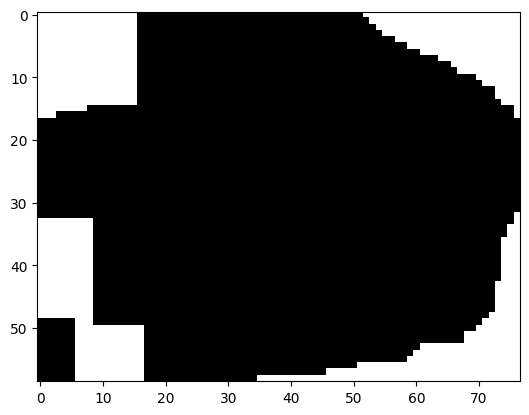

9.jpg NO
10.jpg NO
11.jpg NO
12.jpg NO
13.jpg NO
14.jpg YES


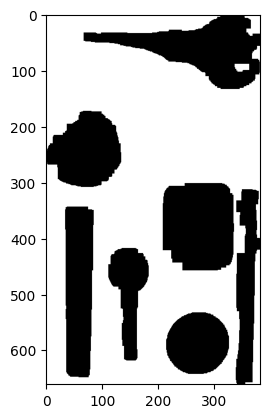

15.jpg YES


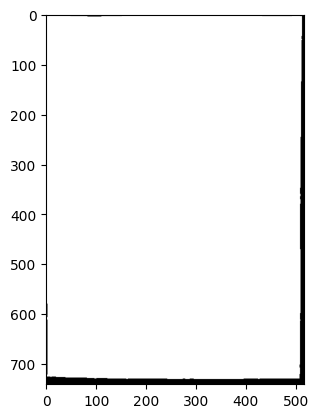

16.jpg YES


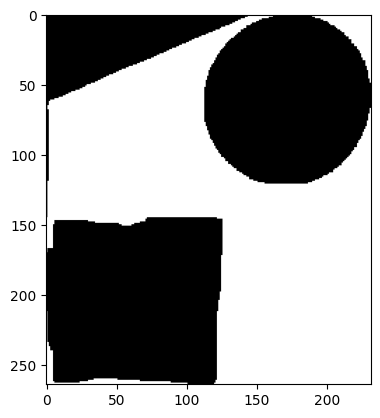

17.jpg YES


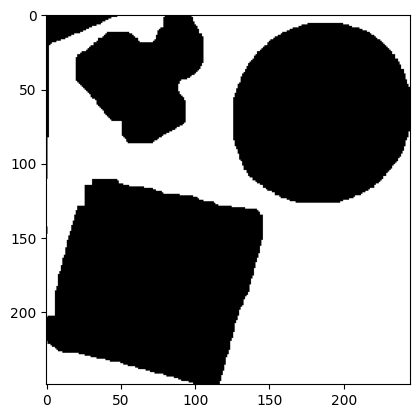

18.jpg YES


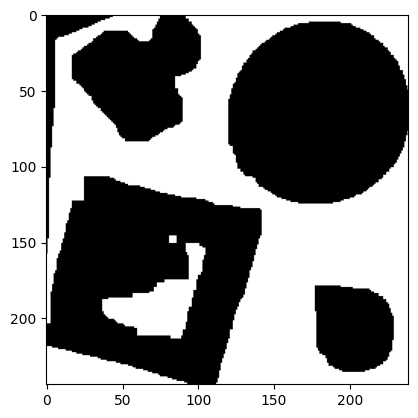

19.jpg NO
20.jpg YES


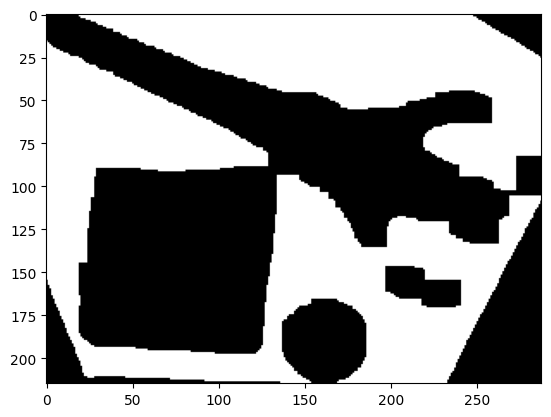

21.jpg YES


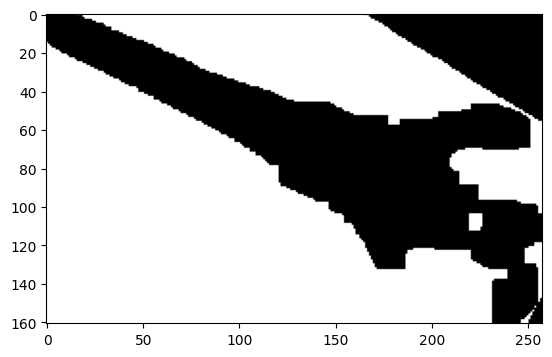

22.jpg YES


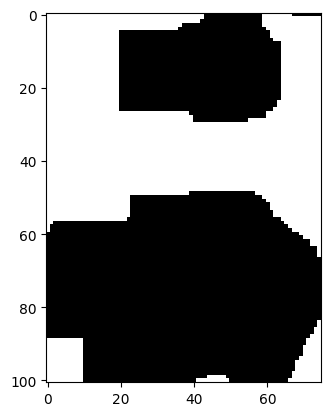

23.jpg NO
24.jpg YES


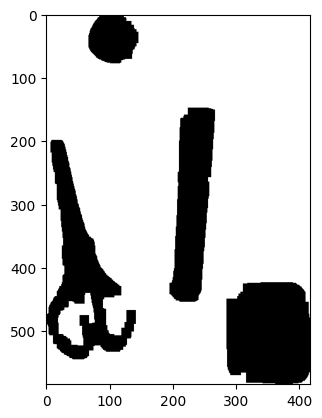

25.jpg YES


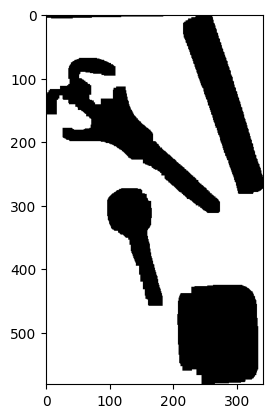

26.jpg NO
27.jpg NO


In [18]:
# Используем общую функцию, 
# которая проделывает все действия от загрузки изображения до ответа
for i in range(1, 28):
    p = './data/case/' + str(i) + '.jpg'
    res = check_image(p)
    print(res[0], res[1])
    if res[1] == 'YES':
        plt.imshow(res[2], cmap = 'gray')
        plt.show()

In [19]:
# По итогу работы алгоритм правильно обработал 24/27 изображений
# Точность алгоритма составила 0,85
# Неправильно обработанные примеры были 
# плохо освещены или состояли из необычных случаев (точка, предельный случай)
